In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

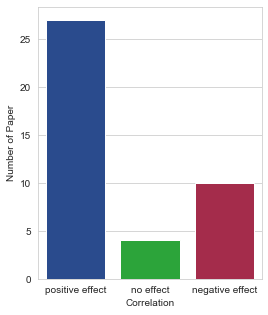

In [147]:
# Create a DataFrame of positive/no/negative correlation between ESG and Financial Performance mentioned by paper
df_paper = pd.DataFrame.from_dict({'positive effect':27, "no effect":4, "negative effect":10}, orient='index', columns=['value'])

# Create the barplot using Seaborn
fig, ax = plt.subplots(figsize=(4, 5))
sns.set_style('whitegrid')
colors = ['#19469e', '#18b82b', '#b81842']
sns.barplot(data=df_paper, x=df_paper.index, y='value', palette=colors)

# Set the labels for the plot
plt.title('')
plt.xlabel('Correlation')
plt.ylabel('Number of Paper')

plt.show()

In [148]:
# Load file
df = pd.read_csv("../3) Data/main_df_no_NAN_99p.csv")

In [149]:
# How the DataFrame looks like
df.head()

,Unnamed: 0,ISIN,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,...,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean,Country of Headquarters,Region of Headquarters,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name
0,2,DK0010244508,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,...,18.19000,0.0,5.201496e+10,1.929737e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
1,3,DK0010244508,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,...,17.60000,0.0,1.828570e+11,6.631311e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
2,4,DK0010244508,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,...,20.58450,0.0,1.980218e+11,8.512478e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
3,5,DK0010244508,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,...,19.76857,0.0,2.821975e+11,8.136144e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
4,6,DK0010244508,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,...,12.20555,0.0,2.292305e+11,9.496474e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials


In [150]:
# Get a lists of 4 TRBC features we want to use and know the attribute of them
unique_values_industry_name = df['TRBC Industry Name'].unique()
unique_values_industry_group = df['TRBC Industry Group Name'].unique()
unique_values_business = df['TRBC Business Sector Name'].unique()
unique_values_economic = df['TRBC Economic Sector Name'].unique()

num_TRBCindustry_name = unique_values_industry_name.size
num_TRBindustry_group = unique_values_industry_group.size
num_TRBCeconomic = unique_values_economic.size
num_TRBCbusiness = unique_values_business.size

print(f"There are {num_TRBCindustry_name} type in TRBC industry name.")
print(f"There are {num_TRBindustry_group} type in TRBC industry group.")
print(f"There are {num_TRBCbusiness} type in TRBC business sector." + f"\nThey are {unique_values_business}")
print(f"There are {num_TRBCeconomic} type in TRBC economic sector." + f"\nThey are {unique_values_economic}")

There are 137 type in TRBC industry name.
There are 59 type in TRBC industry group.
There are 30 type in TRBC business sector.
They are ['Transportation' 'Real Estate' 'Mineral Resources' 'Technology Equipment'
 'Food & Beverages' 'Industrial Goods' 'Consumer Goods Conglomerates'
 'Banking & Investment Services' 'Pharmaceuticals & Medical Research'
 'Healthcare Services & Equipment' 'Automobiles & Auto Parts' 'Retailers'
 'Food & Drug Retailing' 'Industrial & Commercial Services'
 'Renewable Energy' 'Utilities' 'Academic & Educational Services'
 'Applied Resources' 'Cyclical Consumer Services'
 'Cyclical Consumer Products' 'Software & IT Services'
 'Financial Technology (Fintech) & Infrastructure' 'Chemicals'
 'Energy - Fossil Fuels' 'Insurance' 'Telecommunications Services'
 'Personal & Household Products & Services' 'Collective Investments'
 'Uranium' 'Investment Holding Companies']
There are 11 type in TRBC economic sector.
They are ['Industrials' 'Real Estate' 'Basic Materials' 'Te

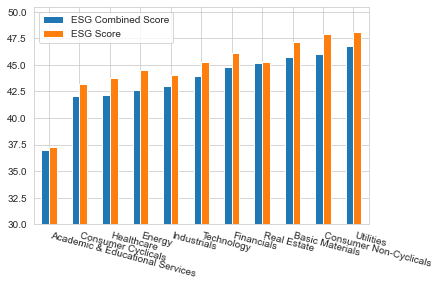

In [151]:
# Overview of ESG score by different industry

# To standardize the value
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']])
#df[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']] = scaler.transform(df[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']])
mean_score = pd.pivot_table(df, values=['ESG Combined Score', 'ESG Score'], index='TRBC Economic Sector Name', aggfunc='mean')
mean_score = mean_score.sort_values('ESG Combined Score')
ax = mean_score.plot(kind='bar')
ax.set_ylim(bottom=30)
plt.xticks(rotation=-15, ha='left')
plt.xlabel('')
plt.show()

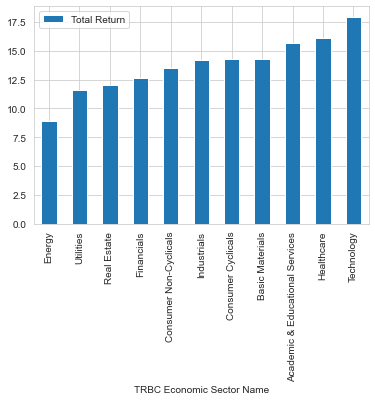

In [152]:
# Overview of Total Return by different industry
mean_score2 = pd.pivot_table(df, values=['Total Return'], index='TRBC Economic Sector Name', aggfunc='mean')
mean_score2 = mean_score2.sort_values('Total Return')
mean_score2.plot(kind='bar')
plt.show()

"Total Return - ESG Score" Correlation analyze by 11 economic sector

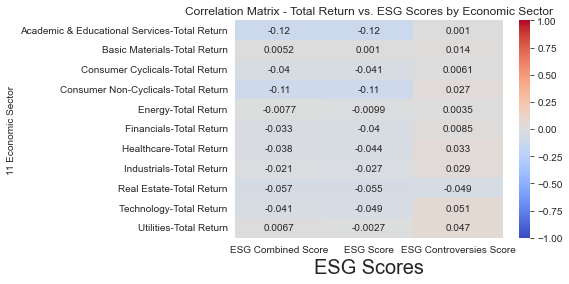

In [153]:
# Group the data by 'TRBC Economic Sector Name' and calculate the correlation between 'Total Return' and the three ESG scores
corr_df = df.groupby('TRBC Economic Sector Name')[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']].corr()

# Extract the correlation coefficients for 'Total Return' and the three ESG scores
corr_total_return = corr_df.loc[(slice(None), 'Total Return'), ['ESG Combined Score', 'ESG Score', 'ESG Controversies Score']]

# Visualize the correlation matrix
sns.heatmap(corr_total_return, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Total Return vs. ESG Scores by Economic Sector')
plt.xlabel('ESG Scores', fontsize=20)
plt.ylabel('11 Economic Sector')
plt.show()

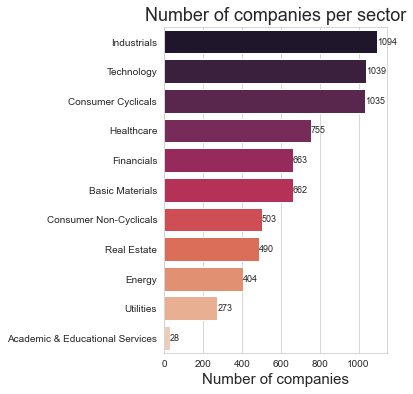

In [154]:
# Company number by sector
sector_counts = df.groupby('TRBC Economic Sector Name')['ISIN'].nunique().sort_values(ascending=False)

# Plot the sector counts as a bar chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(4, 6))

# Plot the sector counts as a horizontal bar chart
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="rocket", ax=ax)

ax.bar_label(ax.containers[0], size=9)
plt.title('Number of companies per sector', size=18)
plt.xlabel('Number of companies', size=15)
plt.ylabel('')
plt.show()

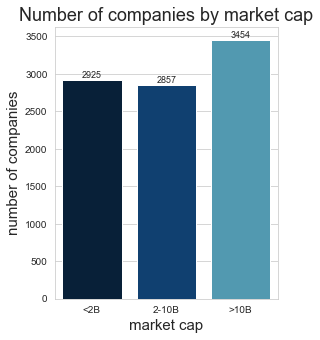

In [155]:
df['Market Cap Category'] = pd.cut(df['Company Market Cap'], bins=[0, 2000000000, 10000000000, float('inf')], labels=['<2B', '2-10B', '>10B'])

# group the companies by market cap category and count the number of companies in each category
market_cap_counts = df.groupby('Market Cap Category')['ISIN'].nunique().sort_values(ascending=False)


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(4, 5))

sns.barplot(x=market_cap_counts.index, y=market_cap_counts.values, palette="ocean", ax=ax)

ax.bar_label(ax.containers[0], size=9)
plt.title('Number of companies by market cap', size=18)
plt.xlabel('market cap', size=15)
plt.ylabel('number of companies', size=15)
plt.show()

"Total Return - ESG Score" Correlation analyze by 30 TRBC business sector

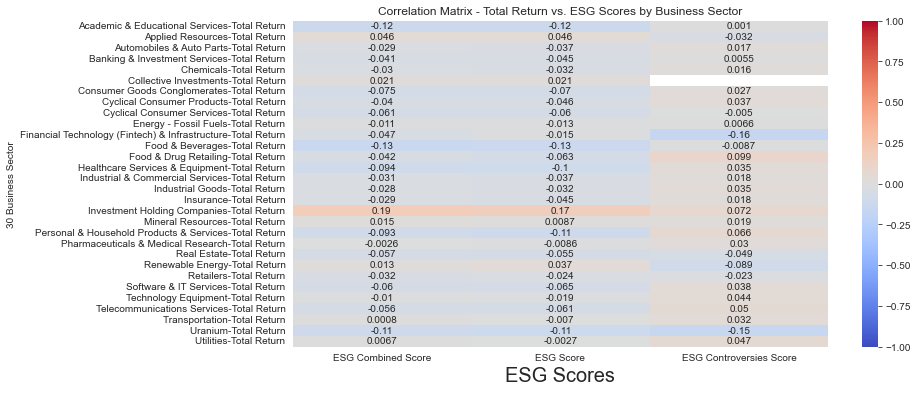

In [156]:
# Group the data by 'TRBC Economic Sector Name' and calculate the correlation between 'Total Return' and the three ESG scores
corr_df = df.groupby('TRBC Business Sector Name')[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']].corr()

# Extract the correlation coefficients for 'Total Return' and the three ESG scores
corr_total_return = corr_df.loc[(slice(None), 'Total Return'), ['ESG Combined Score', 'ESG Score', 'ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_total_return, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Total Return vs. ESG Scores by Business Sector')
plt.xlabel('ESG Scores', fontsize=20)
plt.ylabel('30 Business Sector')
plt.show()

"Total Return - ESG Score" Correlation analyze by 59 TRBC industry group sector

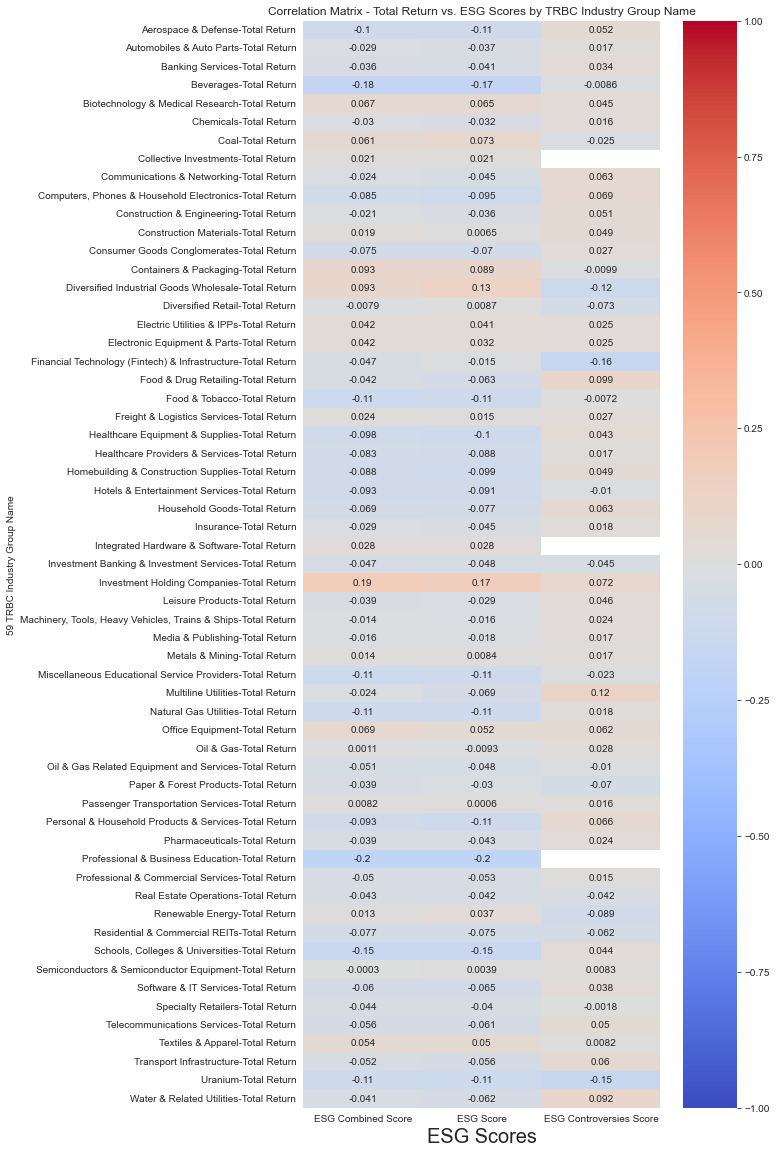

In [157]:
# Group the data by 'TRBC Economic Sector Name' and calculate the correlation between 'Total Return' and the three ESG scores
corr_df = df.groupby('TRBC Industry Group Name')[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']].corr()

# Extract the correlation coefficients for 'Total Return' and the three ESG scores
corr_total_return = corr_df.loc[(slice(None), 'Total Return'), ['ESG Combined Score', 'ESG Score', 'ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 20))
sns.heatmap(corr_total_return, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Total Return vs. ESG Scores by TRBC Industry Group Name')
plt.xlabel('ESG Scores', fontsize=20)
plt.ylabel('59 TRBC Industry Group Name')
plt.show()

"Total Return - ESG Score" Correlation analyze by 117 TRBC industry sector

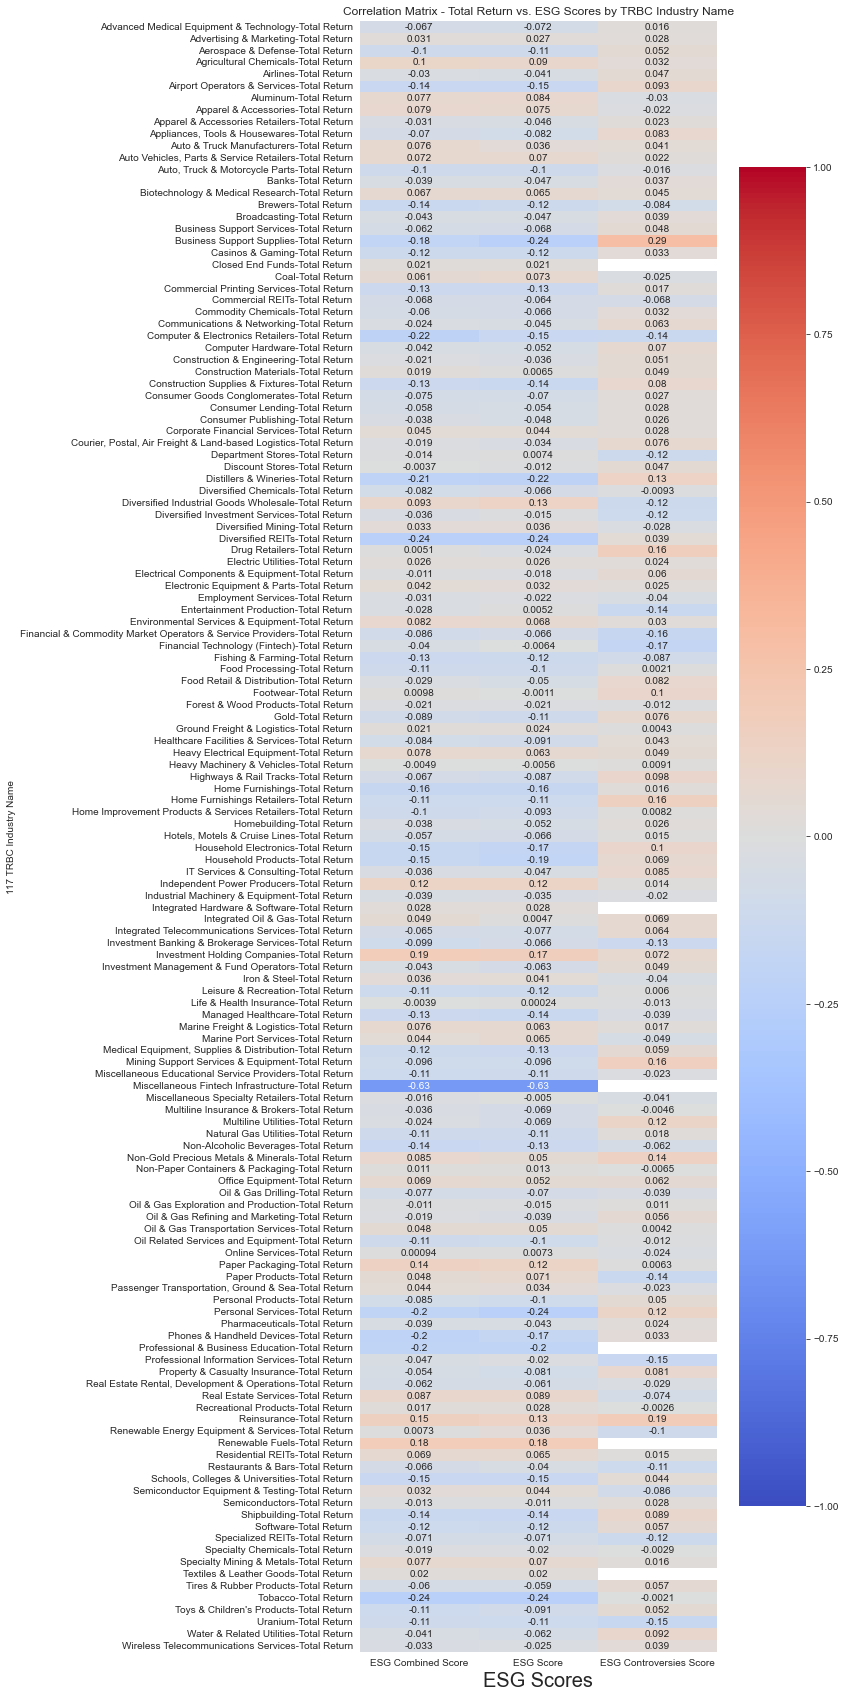

In [158]:
# Group the data by 'TRBC Economic Sector Name' and calculate the correlation between 'Total Return' and the three ESG scores
corr_df = df.groupby('TRBC Industry Name')[['Total Return', 'ESG Combined Score', 'ESG Score', 'ESG Controversies Score']].corr()

# Extract the correlation coefficients for 'Total Return' and the three ESG scores
corr_total_return = corr_df.loc[(slice(None), 'Total Return'), ['ESG Combined Score', 'ESG Score', 'ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 30))
sns.heatmap(corr_total_return, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Total Return vs. ESG Scores by TRBC Industry Name')
plt.xlabel('ESG Scores', fontsize=20)
plt.ylabel('117 TRBC Industry Name')
plt.show()

In [159]:
# Inspect the one with strongest negative correlation
misc_fintech_infra_df = df[df['TRBC Industry Name'] == 'Miscellaneous Fintech Infrastructure']
print(misc_fintech_infra_df)

# Only one company in this sector with 4 years of data, the company is Hypoport Aktie, a german company

       Unnamed: 0          ISIN  Year  Total Return  ESG Score  \
23801      100263  DE0005493365  2018      1.960784  42.680589   
23802      100264  DE0005493365  2019    112.550607  38.741885   
23803      100265  DE0005493365  2020     63.492063  47.548973   
23804      100266  DE0005493365  2021     -0.776699  50.909852   

       ESG Combined Score  ESG Controversies Score  Social Pillar Score  \
23801           42.680589                    100.0            67.156140   
23802           38.741885                    100.0            56.926471   
23803           47.548973                    100.0            62.103896   
23804           50.909852                    100.0            60.208023   

       Governance Pillar Score  Environmental Pillar Score  ...  Volume  \
23801                26.375969                   22.222222  ...     0.0   
23802                29.316239                   10.101010  ...     0.0   
23803                42.835366                   10.471491  ...     

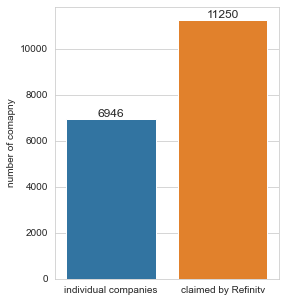

In [160]:
# Create a DataFrame with two rows
data = {'x': ['individual companies', 'claimed by Refinitv'], 'y': [6946, 11250]}
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 5))
# Plot the data
sns.barplot(data=df, x='x', y='y', ax=ax)
ax.bar_label(ax.containers[0], size=12)
ax.set_xlabel('')
ax.set_ylabel('number of comapny')

# Show the plot
plt.show()